# LPA Prediction based on CGPA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/placement.csv')

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Package')

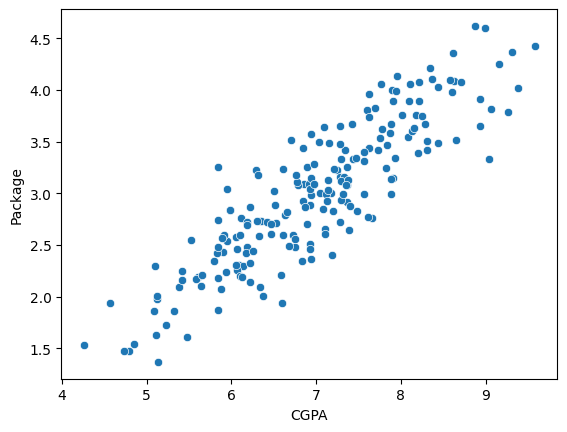

In [6]:

sns.scatterplot(data=df,x='cgpa',y='package')
plt.xlabel('CGPA')
plt.ylabel('Package')

Splitting to Independent & Dependent columns

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:

print('Shape of X = {} & Shape of y = {}'.format(X.shape,y.shape))

Shape of X = (200, 1) & Shape of y = (200,)


Splitting the columns to train and split data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Explanation
- X_train: This will contain the features (independent variables) for the training set.
- X_test: This will contain the features for the testing set.
- y_train: This will contain the corresponding target values (dependent variable) for the training set.
- y_test: This will contain the corresponding target values for the testing set.
- The train_test_split function is typically used for machine learning tasks to split a dataset into two subsets: one for training a model and another for evaluating its performance. The key parameters used in this function are:

- X: This should be your feature dataset, which contains all the independent variables.
- y: This should be your target variable, which contains the dependent variable you want to predict.
-test_size: This parameter specifies the proportion of the dataset that should be allocated to the testing set. In this case, it's set to 0.2, which means 20% of the data will be used for testing, and the remaining 80% will be used for training.
- random_state: This parameter is used to seed the random number generator. Setting it to a specific value (e.g., random_state=2) ensures that the split will be reproducible, meaning you'll get the same train/test split if you run the code again with the same random_state.

model importing & assigning

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
X_train.head(5)

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [13]:
y_train.head(5)

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
Name: package, dtype: float64

In [14]:
model.predict(X_test.iloc[1].values.reshape(1,1))[0]

/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3.0932446877463504

In [15]:
y_test.iloc[1].reshape(1,1)[0][0]

3.49

/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


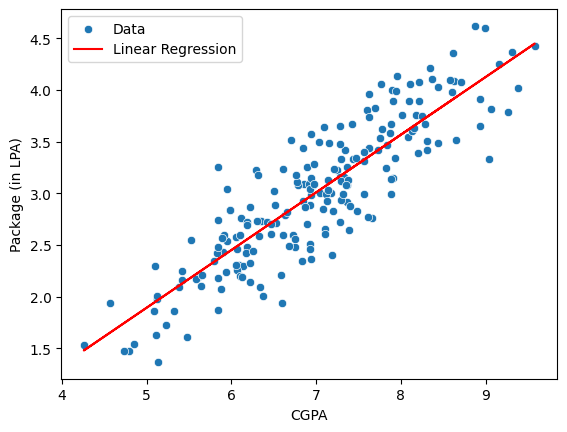

In [16]:
sns.scatterplot(data=df, x='cgpa', y='package', label='Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Regression')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.legend() 
plt.show() 

In [17]:
model.predict(np.array([[6.1]]))[0]

/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2.5073951156500245

In [28]:
# using model
def lpa_predict_m(score):
    val = np.array([[score]])
    a = model.predict(val)[0]
    return a


In [29]:
lpa_predict_m(7.6)

/home/jo/Documents/Machine-Learning/ML-Models/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3.3443230757876323

In [32]:
# using formula
def lpa_predict_f(score):
    m = model.coef_[0]
    b = model.intercept_
    x = score
    y = m * x + b
    return y

In [33]:
lpa_predict_f(7.6)

3.3443230757876323

In [25]:
model.coef_[0]

0.557951973425072

In [27]:
model.intercept_

-0.8961119222429144

In [35]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(model,f)